<h1><center>Image Classification using CIFAR-10 dataset</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from titlecase import titlecase

Using TensorFlow backend.


### Load the dataset 

In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

CIFAR-10 dataset already exists as in keras datasets so we simple use the load_data() function to download it. 

### Lets have a look at some of the training images

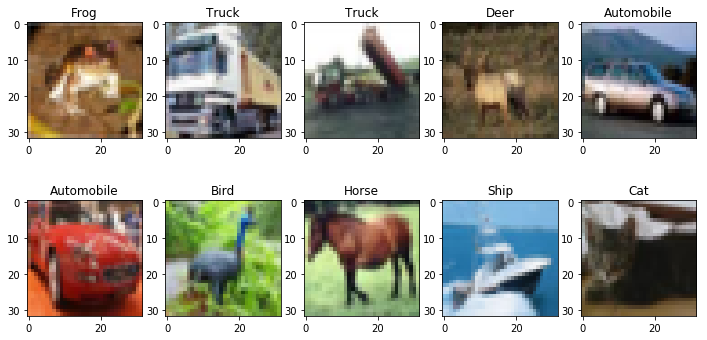

In [4]:
fig = plt.figure(figsize=(12, 6))
for i in range(1, 11):
    img = x_train[i - 1]
    fig.add_subplot(2, 5, i)
    plt.title(titlecase(labels[y_train[i - 1][0]]))
    plt.imshow(img, cmap='gray')
plt.show()

### Preprocess data

In [5]:
def preprocess(images, labels):
    (total, rows, cols, channels) = images.shape
    number_class_labels = len(np.unique(labels))
    images = images.reshape(total, rows, cols, channels)
    images = images.astype('float32')
    images /= 255
    labels = to_categorical(labels, number_class_labels)
    return (images, labels)

In [6]:
from sklearn.model_selection  import train_test_split
# Preprocess train set
(X_train, Y_train) = preprocess(x_train, y_train)

# Preprocess train set
(X_test, Y_test) = preprocess(x_test, y_test)

(X_train, X_val, Y_train, Y_val) = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 21)

### Create our convolutional model

In [7]:
from sklearn.model_selection  import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [8]:
def schedule_rate(epoch):
    if epoch > 75:
        return 0.0005
    elif epoch > 100:
        return 0.0003       
    return 0.001

In [9]:
# Create model here
def cnn_model(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3), activation = params['activation']))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation = params['activation']))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    model.add(Dropout(params['dropout_1']))

    model.add(Conv2D(64, (3,3), padding='same', activation = params['activation']))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation = params['activation']))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    model.add(Dropout(params['dropout_2']))

    model.add(Conv2D(128, (3,3), padding='same', activation = params['activation']))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation = params['activation']))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
    model.add(Dropout(params['dropout_3']))

    model.add(Flatten())
    model.add(Dense(10, activation=params['last_activation']))
    
    model.compile(optimizer=params['optimizer'](),
                  loss = params['losses'], 
                  metrics = ['accuracy'])
    
    history = model.fit(
                        x_train,y_train,
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0,
                        callbacks = [LearningRateScheduler(schedule_rate)])


    return history,model

In [10]:
import talos as ta
from keras.optimizers import Adam, Nadam
from keras.activations import softmax, relu, elu, sigmoid
from keras.losses import categorical_crossentropy, logcosh

In [11]:
parameters = {
     'batch_size': (30,50,60),
     'epochs': (50,100,1000),
     'dropout_1': (0.2,0.3,0.4),
     'dropout_2': (0.2,0.3,0.4),
     'dropout_3': (0.2,0.3,0.4),
     'optimizer': [Nadam, Adam],
     'losses': [categorical_crossentropy, logcosh],
     'activation':[relu, elu],
     'last_activation': [softmax, sigmoid]
    }

In [12]:
t = ta.Scan(x = X_train,
            y = Y_train,
            x_val = X_val,
            y_val = Y_val,
            model = cnn_model,
            params = parameters,
            grid_downsample = 0.01,
            print_params = True
           )

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

{'batch_size': 43, 'epochs': 8, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


  6%|█████▏                                                                            | 1/16 [03:04<46:08, 184.54s/it]

{'batch_size': 48, 'epochs': 6, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 12%|██████████▎                                                                       | 2/16 [05:19<39:37, 169.81s/it]

{'batch_size': 48, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 19%|███████████████▍                                                                  | 3/16 [08:39<38:42, 178.64s/it]

{'batch_size': 31, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 25%|████████████████████▌                                                             | 4/16 [12:46<39:50, 199.21s/it]

{'batch_size': 34, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 31%|█████████████████████████▋                                                        | 5/16 [16:44<38:38, 210.81s/it]

{'batch_size': 30, 'epochs': 6, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 38%|██████████████████████████████▊                                                   | 6/16 [19:33<33:01, 198.18s/it]

{'batch_size': 36, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 44%|███████████████████████████████████▉                                              | 7/16 [23:26<31:19, 208.79s/it]

{'batch_size': 41, 'epochs': 6, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 50%|█████████████████████████████████████████                                         | 8/16 [25:52<25:19, 189.94s/it]

{'batch_size': 33, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 56%|██████████████████████████████████████████████▏                                   | 9/16 [29:30<23:08, 198.38s/it]

{'batch_size': 48, 'epochs': 7, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 62%|██████████████████████████████████████████████████▋                              | 10/16 [31:55<18:13, 182.24s/it]

{'batch_size': 30, 'epochs': 7, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 69%|███████████████████████████████████████████████████████▋                         | 11/16 [34:53<15:06, 181.21s/it]

{'batch_size': 44, 'epochs': 7, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 75%|████████████████████████████████████████████████████████████▊                    | 12/16 [37:18<11:20, 170.16s/it]

{'batch_size': 34, 'epochs': 6, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 81%|█████████████████████████████████████████████████████████████████▊               | 13/16 [39:46<08:10, 163.48s/it]

{'batch_size': 35, 'epochs': 5, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


 88%|██████████████████████████████████████████████████████████████████████▉          | 14/16 [42:01<05:10, 155.04s/it]

{'batch_size': 42, 'epochs': 6, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Adam'>, 'losses': <function logcosh at 0x00000286AE6E2950>, 'activation': <function elu at 0x00000286AE70F8C8>, 'last_activation': <function softmax at 0x00000286AE70F7B8>}


 94%|███████████████████████████████████████████████████████████████████████████▉     | 15/16 [44:20<02:30, 150.07s/it]

{'batch_size': 33, 'epochs': 9, 'dropout': 0.2, 'optimizer': <class 'keras.optimizers.Nadam'>, 'losses': <function categorical_crossentropy at 0x00000286AE6E29D8>, 'activation': <function relu at 0x00000286AE70FAE8>, 'last_activation': <function sigmoid at 0x00000286AE70FBF8>}


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [48:22<00:00, 177.86s/it]


Scan Finished!


In [13]:
print("Scan Summary Details")
t.details

Scan Summary Details


random_method            uniform_mersenne
reduction_method                     None
reduction_interval                     50
reduction_window                       20
grid_downsample                      0.01
reduction_threshold                   0.2
reduction_metric                  val_acc
reduce_loss                         False
experiment_name             112418200223_
complete_time              11/24/18/20:50
x_shape                (40000, 32, 32, 3)
y_shape                       (40000, 10)
dtype: object

In [14]:
#("The hyper-parameters selected in each iteration and their train and val accuracies")
r = ta.Reporting(t)
r.data.head()

,round_epochs,val_loss,val_acc,loss,acc,lr,batch_size,epochs,dropout,optimizer,losses,activation,last_activation
1,8,0.015382821318833157,0.7806999959290027,0.013993583691690582,0.804999996086955,0.001,43,8,0.2,<class 'keras.optimizers.Adam'>,<function logcosh at 0x00000286AE6E2950>,<function relu at 0x00000286AE70FAE8>,<function sigmoid at 0x00000286AE70FBF8>
2,6,0.659924005150795,0.7858000000953674,0.5480762988507748,0.8085250000238419,0.001,48,6,0.2,<class 'keras.optimizers.Nadam'>,<function categorical_crossentropy at 0x000002...,<function relu at 0x00000286AE70FAE8>,<function sigmoid at 0x00000286AE70FBF8>
3,9,0.025885010549426078,0.7452999981880188,0.015838953499309718,0.7765500004053116,0.001,48,9,0.2,<class 'keras.optimizers.Nadam'>,<function logcosh at 0x00000286AE6E2950>,<function relu at 0x00000286AE70FAE8>,<function softmax at 0x00000286AE70F7B8>
4,9,0.01436277858442627,0.7989999908566475,0.012163168090966065,0.8350999902412295,0.001,31,9,0.2,<class 'keras.optimizers.Nadam'>,<function logcosh at 0x00000286AE6E2950>,<function elu at 0x00000286AE70F8C8>,<function sigmoid at 0x00000286AE70FBF8>
5,9,0.6471811138227582,0.8023999977946281,0.4053575285501778,0.8580249937146902,0.001,34,9,0.2,<class 'keras.optimizers.Nadam'>,<function categorical_crossentropy at 0x000002...,<function relu at 0x00000286AE70FAE8>,<function softmax at 0x00000286AE70F7B8>


In [15]:
print("Number of iterations during scanning")
r.rounds()

Number of iterations during scanning


16

In [16]:
print("Highest validation accuracy")
r.high()

Highest validation accuracy


'0.8056999968290329'

In [17]:
# returns the number of rounds it took to find best model
r.rounds2high()

11

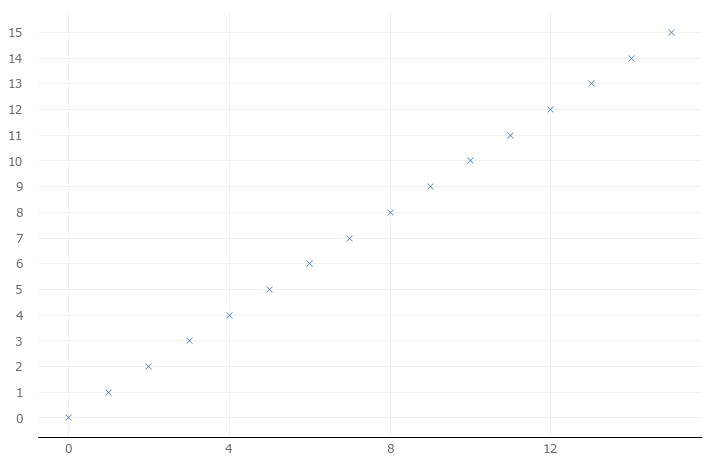

In [18]:
# a regression plot for two dimensions 
r.plot_regs()

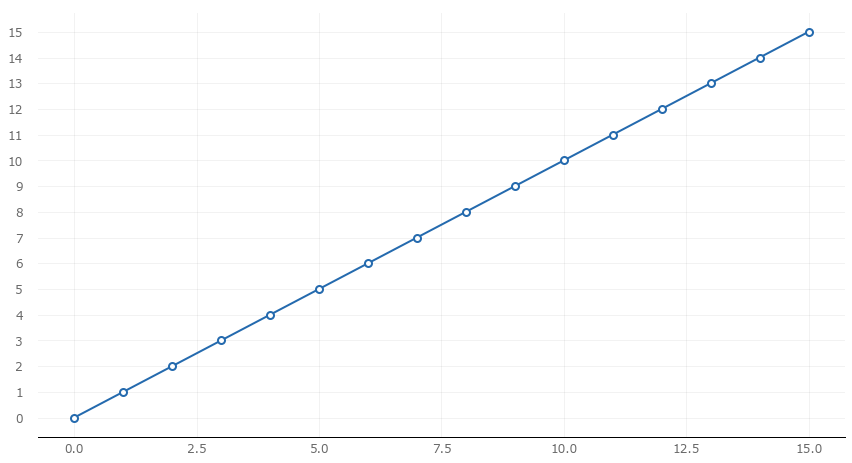

In [19]:
# line plot
r.plot_line()

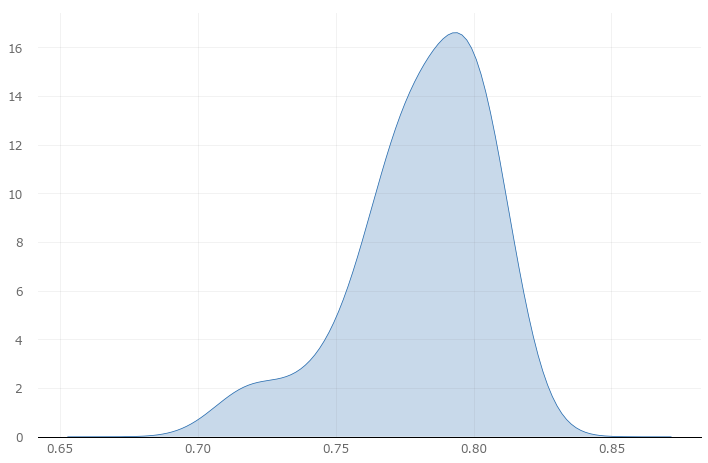

In [20]:
# up to two dimensional kernel density estimator
r.plot_kde('val_acc')

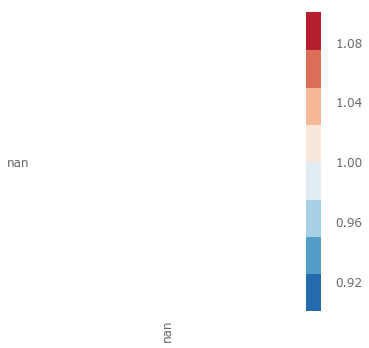

In [21]:
# heatmap correlation
r.plot_corr()

In [26]:
from sklearn.metrics import accuracy_score
p = ta.Predict(t)
predicted_test_labels = p.predict_classes(X_test)
accuracy_score(y_test,predicted_test_labels)

0.7964

In [28]:
e = ta.Evaluate(t)
e.evaluate(X_train, Y_train, folds=10, average='macro')

62.53% (+/- 0.35%)
